<a href="https://colab.research.google.com/github/guimaraess2/Data-analysis-with-Folium/blob/master/AB_NYC_2019_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
! pwd

/content/sample_data


In [33]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


**Importando as bibliotecas/Importing libraries**

In [0]:
import pandas as pd
import numpy as np
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')


**Carregando o dataset/Loading the dataset**

In [0]:
df=pd.read_csv('AB_NYC_2019.csv')

**Visualizando as primeiras linhas/Viewing the first lines**

In [36]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Numero de linhas e colunas/Number of rows and columns**

In [37]:
df.shape

(48895, 16)

**Visualizando o tipo de dados/Viewing the data type**

In [38]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Numero de valores nulos/Number of null values**

In [39]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Remover colunas desnecessárias para análise /Remove unnecessary columns for analysis**

In [0]:
df.drop(['name','host_name','last_review','reviews_per_month'], axis=1, inplace=True)  

In [41]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Dados estatísticos / Statistic data**

In [42]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


**Relação do preço com a localização do imóvel / Price relation with property location**

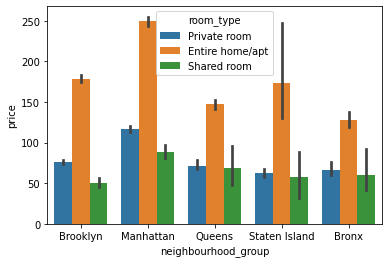

In [43]:
sns.barplot(x='neighbourhood_group',y='price', hue='room_type',data=df);

**Número de avaliações por bairro / Number of reviews by neighborhood**

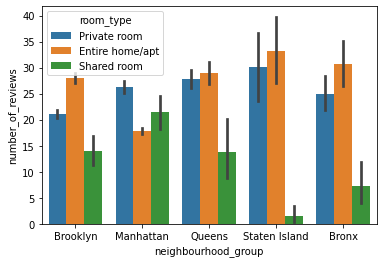

In [44]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews', hue='room_type',data=df);

**Disponibilidade de dias ao ano para reserva / Availability of days a year for reservation**

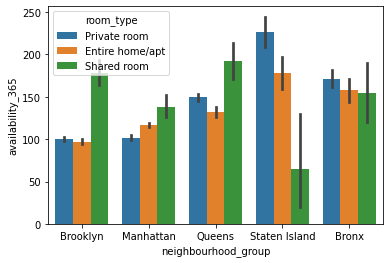

In [45]:
sns.barplot(x='neighbourhood_group',y='availability_365', hue='room_type',data=df);

**Instalando o folium/Installing folium**

In [46]:
pip install folium

In [0]:
import folium

**Localizando área no mapa através da latitude e longitude/Locating area on the map by latitude and longitude** 

In [48]:
mapa = folium.Map(location=[40.64749 ,	-73.97237], width=800,height=500,tiles='Stamen Terrain')
mapa

In [49]:
folium.Marker([40.64749,	-73.97237], popup='<i>Brooklyn</i>', tooltip='click here!', icon=folium.Icon(color='red')).add_to(mapa)
mapa.add_child(folium.LatLngPopup())
mapa

**Visualizando o mapa de calor/Viewing the heat map**

In [0]:
coordenadas=[]
for lat, long in zip(df.latitude.values[:45000], df.longitude.values[:45000]):
  coordenadas.append([lat,long])
  

In [0]:
mapa = folium.Map(location=[40.64749,	-73.97237], width=1000,height=800,tiles='Stamen Terrain')


In [52]:
mapa.add_child(plugins.HeatMap(coordenadas))


**Inserindo marcadores/Inserting bookmarks**

In [53]:
lat = df['latitude'][:4500].values
long = df['longitude'][:4500].values
mapa = folium.Map(location=[40.64749,	-73.97237], width=1000,height=800,tiles='Stamen Terrain')

for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa)
mapa


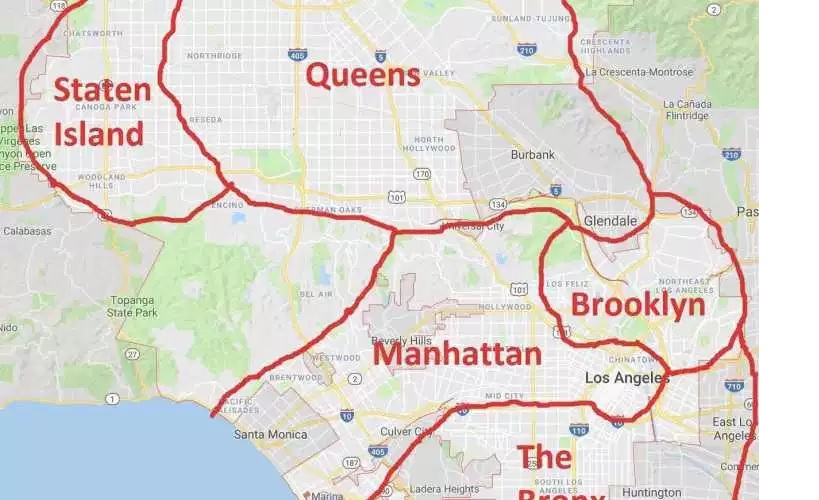

In [54]:
from IPython.display import Image
Image(filename='New York.jpg')

**Plotando mapa de Nova Iorque definindo as areas de acordo com estilos de acomodação / Plotting New York map defining areas according to accommodation styles**

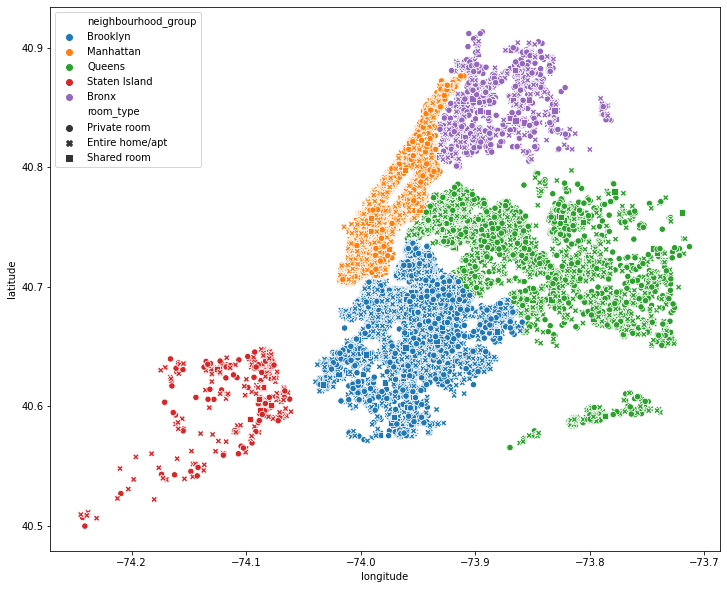

In [55]:
 plt.subplots(figsize = (12,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', s = 40, alpha = 'auto', style='room_type',data=df);
